In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Load MetroBike "trips" Dataset

In [3]:
# CSV downloaded Dec 20, 2022
trips = pd.read_csv('../data/data_austintexas_gov/Austin_MetroBike_Trips_new2.csv') 

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
trips.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,9900285854,Annual (San Antonio B-cycle),207.0,NaN,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10.0,2014.0
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,NaN,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10.0,2014.0
2,9900285856,Annual Membership (Austin B-cycle),214.0,NaN,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,10.0,2014.0
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,NaN,10/26/2014,13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10.0,2014.0
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,NaN,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0


In [5]:
# check number of rows/trips
trips.shape[0]

1847746

In [6]:
trips.dtypes

Trip ID                    int64
Membership Type           object
Bicycle ID                object
Bike Type                float64
Checkout Date             object
Checkout Time             object
Checkout Kiosk ID        float64
Checkout Kiosk            object
Return Kiosk ID           object
Return Kiosk              object
Trip Duration Minutes      int64
Month                    float64
Year                     float64
dtype: object

In [7]:
# Adjusting the Return Kiosk ID to float 64
# however, on label is a string, so changing it to nan
trips.loc[trips['Return Kiosk ID']=="Event",'Return Kiosk ID'] = np.nan
trips['Return Kiosk ID'] = trips['Return Kiosk ID'].astype(float)

In [8]:
trips.dtypes

Trip ID                    int64
Membership Type           object
Bicycle ID                object
Bike Type                float64
Checkout Date             object
Checkout Time             object
Checkout Kiosk ID        float64
Checkout Kiosk            object
Return Kiosk ID          float64
Return Kiosk              object
Trip Duration Minutes      int64
Month                    float64
Year                     float64
dtype: object

# Load "kiosk" Dataset

In [9]:
# CSV downloaded Dec 20, 2022
kiosk = pd.read_csv('../data/data_austintexas_gov/Austin_MetroBike_Kiosk_Locations_new2.csv') 

In [10]:
kiosk.head()

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
0,2823,Capital Metro HQ - East 5th at Broadway,active,"(30.2563, -97.71007)",2910 E 5th St,NaN,16684.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,3,NaN,01/04/2021 12:00:00 AM
1,3291,11th & San Jacinto,active,"(30.27193, -97.73854)",310 E. 11th St.,NaN,32503.0,sidewalk,11.0,solar,35.0,5.0,NaN,1,NaN,01/04/2021 12:00:00 AM
2,3292,East 4th & Chicon,active,"(30.25987, -97.72373)",1819 East 4th St.,NaN,32516.0,undetermined_parking,9.0,solar,30.0,5.0,NaN,3,NaN,01/04/2021 12:00:00 AM
3,3293,East 2nd & Pedernales,active,"(30.25542, -97.71665)",2414 E 2nd St,NaN,16729.0,nonmetered_parking,10.0,solar,20.0,15.0,Kiosk replaced by Barton Sp/Riverside. Old ci...,3,NaN,01/04/2021 12:00:00 AM
4,3294,Lavaca & 6th,active,"(30.268887, -97.745242)",601 Lavaca St.,NaN,32515.0,sidewalk,12.0,solar,25.0,8.0,"double sided, remeasure",9,NaN,03/04/2022 10:21:00 AM


In [11]:
# check number of rows/kiosk locations
kiosk.shape[0]

102

In [12]:
kiosk.dtypes

Kiosk ID               int64
Kiosk Name            object
Kiosk Status          object
Location              object
Address               object
Alternate Name        object
City Asset Number    float64
Property Type         object
Number of Docks      float64
Power Type            object
Footprint Length     float64
Footprint Width      float64
Notes                 object
Council District       int64
Image                float64
Modified Date         object
dtype: object

# Data Cleaning Begins..

## 1. Remove trips that are "too short" or "too long"

Note: Plotting and checking out the Trip Duration data, but ultimately REMOVING THE SHORT TRIPS (0 MINUTES) and TRIPS LONGER THAN X DAYS (see next cell) in later cells

In [13]:
# Removing trips that are longer than this upper limit
upplim = 5760 # duration in minutes
print(upplim*(1/60)*(1/24)," days") # printing the limit in days units

4.0  days


In [14]:
trips['Trip Duration Minutes'].describe()

count    1.847746e+06
mean     2.982984e+01
std      1.267121e+02
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.800000e+01
max      3.423800e+04
Name: Trip Duration Minutes, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffae9739130>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffae97397f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffac9e33d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffae9739eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffae9745250>],
 'means': []}

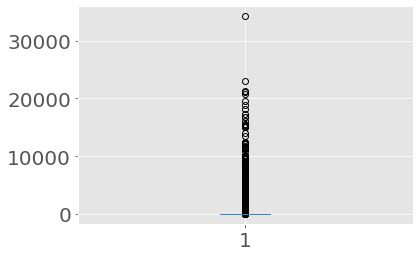

In [15]:
plt.boxplot(trips['Trip Duration Minutes'])
# some of the trips are too short (0 minutues) 
# and potentially too long 
# removing these trips 

(0.0, 500.0)

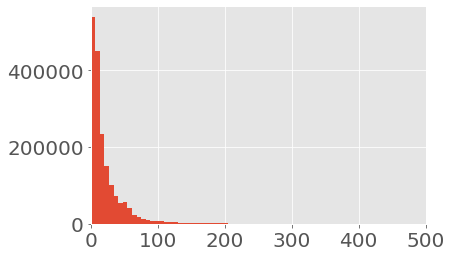

In [16]:
plt.hist(trips['Trip Duration Minutes'], bins = 5000)
plt.xlim(0,500)

In [17]:
start_trips = trips.shape[0]
print(trips.shape[0])

1847746


REMOVING THE SHORT TRIPS (0 MINUTES) and TRIPS LONGER THAN X DAYS

In [18]:
trips = trips[(trips['Trip Duration Minutes']>0) & (trips['Trip Duration Minutes']<=upplim)]

Lets look at the data after this change

In [19]:
after_trips = trips.shape[0]
print(trips.shape[0])

1825892


In [20]:
print("Removed: ",start_trips-after_trips)
print("Percent Removed",round(((start_trips-after_trips)/start_trips)*100,2)," %")

Removed:  21854
Percent Removed 1.18  %


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffade9cf700>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffade9cfdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffade9cf3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffade9dc4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffade9dc820>],
 'means': []}

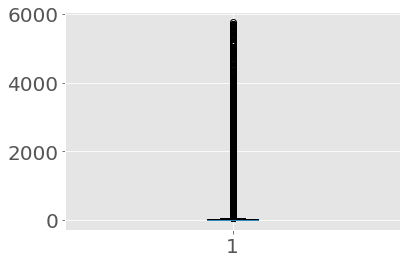

In [21]:
# replotting
plt.boxplot(trips['Trip Duration Minutes'])

(0.0, 500.0)

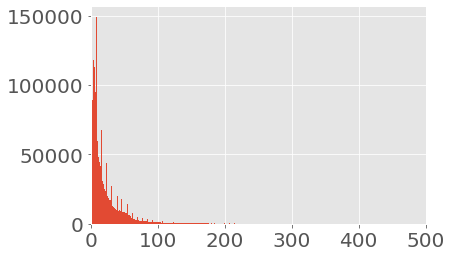

In [22]:
plt.hist(trips['Trip Duration Minutes'], bins = 5000)
plt.xlim(0,500)

## 2. Removing these trip rows, based on the checkout kiosk name, the trips appear to be maintenance-related trips

In [23]:
# remove blank spaces at start and end 
trips['Checkout Kiosk'] = trips['Checkout Kiosk'].str.strip()
trips['Return Kiosk'] = trips['Return Kiosk'].str.strip()
kiosk['Kiosk Name'] = kiosk['Kiosk Name'].str.strip()

In [24]:
# Checkout Kiosk
trips = trips.loc[trips['Checkout Kiosk'] != 'Customer Service']
trips = trips.loc[trips['Checkout Kiosk'] != 'Re-branding']
trips = trips.loc[trips['Checkout Kiosk'] != 'Repair Shop']
trips = trips.loc[trips['Checkout Kiosk'] != 'Shop']
trips = trips.loc[trips['Checkout Kiosk'] != 'Main Office'] # Probably testing 
trips = trips.loc[trips['Checkout Kiosk'] != 'Stolen'] # removing these too

In [25]:
# There are some Missing and Stolen, but NOT removing them - because I want to count those checkouts as trips...
# even if they are not returned properly..

# Return Kiosk
#trips = trips.loc[trips['Checkout Kiosk'] != 'Stolen'] # removing these too
#trips = trips.loc[trips['Checkout Kiosk'] != 'Stolen'] # removing these too

## 3. Creating a Dataframe of the Kiosk Names and the last ID used

Adding Checkout DateTime & Return DateTime columns

In [26]:
# Creating a Checkout DateTime column to combine the Date and Time columns
trips["Checkout DateTime"] = trips["Checkout Date"] + " " + trips["Checkout Time"]

In [27]:
# Converting to DateTime type
# Need this so max and min functions work correctly
trips["Checkout DateTime"] = pd.to_datetime(trips["Checkout DateTime"]) 

In [28]:
# Calculating a Return DateTime column
from datetime import datetime, timedelta
return_datetime = []
# for loop because I couldn't sent in a series into the timedelta function...
for start_time, delta_time in zip(trips["Checkout DateTime"], trips["Trip Duration Minutes"]):
    return_datetime.append(start_time + timedelta(minutes=delta_time))
        
trips["Return DateTime"] = return_datetime

In [29]:
trips.dtypes

Trip ID                           int64
Membership Type                  object
Bicycle ID                       object
Bike Type                       float64
Checkout Date                    object
Checkout Time                    object
Checkout Kiosk ID               float64
Checkout Kiosk                   object
Return Kiosk ID                 float64
Return Kiosk                     object
Trip Duration Minutes             int64
Month                           float64
Year                            float64
Checkout DateTime        datetime64[ns]
Return DateTime          datetime64[ns]
dtype: object

Retrieving a list of all the KIOSK NAMES

In [30]:
# Retrieving a list of all the kiosk names..
all_names = sorted(np.unique(np.concatenate((trips['Checkout Kiosk'].unique() , trips['Return Kiosk'].unique()))))
print('first 5...')
print(all_names[0:5], "\n")

# Removing the temporary/non-permanent & maintenance kiosk names from this list
names2remove = ['ACL 2019 Drop Off', 'Earth Day ATX 2017', "Eeyore's 2017", "Eeyore's 2018", 
                  'Fantasy Zilker', 'MapJam at French Legation', 'MapJam at Hops & Grain Brewery', 
                  'MapJam at Pan Am Park', 'MapJam at Scoot Inn', 'Marketing Event', 'Mobile Station', 
                  'Mobile Station @ Bike Fest', 'Mobile Station @ Boardwalk Opening Ceremony', 
                  'Mobile Station @ Unplugged', 'Springfest 2022',
                 'Customer Service', 'Main Office', 'Main Shop', 'Missing', 'Repair Shop', 'Shop', 'Stolen']
print("names to REMOVE:\n ", names2remove, "\n")

for remove_name in names2remove:
    all_names.remove(remove_name)

first 5...
['10th & Red River', '10th/Red River', '11th & Salina', '11th & San Jacinto', '11th/Congress @ The Texas Capitol'] 

names to REMOVE:
  ['ACL 2019 Drop Off', 'Earth Day ATX 2017', "Eeyore's 2017", "Eeyore's 2018", 'Fantasy Zilker', 'MapJam at French Legation', 'MapJam at Hops & Grain Brewery', 'MapJam at Pan Am Park', 'MapJam at Scoot Inn', 'Marketing Event', 'Mobile Station', 'Mobile Station @ Bike Fest', 'Mobile Station @ Boardwalk Opening Ceremony', 'Mobile Station @ Unplugged', 'Springfest 2022', 'Customer Service', 'Main Office', 'Main Shop', 'Missing', 'Repair Shop', 'Shop', 'Stolen'] 



Build the DATAFRAME with historical information on names used, when, & ID numbers..

In [31]:
# Loop through each kiosk name and build a dataframe (LARGE DATAFRAME)
# of information regarding when that name was used and what the kiosk ID was 
name_dates_ids = pd.DataFrame(columns=['Kiosk Name','First Date Used','Last Date Used','First ID','Last ID'])

for name_test in all_names:
    # subsets of trips    
    trips_set_checkout = trips.loc[(trips["Checkout Kiosk"] == name_test)&(trips["Checkout Kiosk ID"].notnull())]
    trips_set_return = trips.loc[(trips["Return Kiosk"] == name_test)&(trips["Return Kiosk ID"].notnull())]
    
    #print(name_test)    
    # ---------------
    # First Date
    # ---------------
    first_date_checkout = trips_set_checkout["Checkout DateTime"].min()
    first_date_return = trips_set_return["Return DateTime"].min()
    first_date = min([first_date_checkout,first_date_return])

    checkout_ID_first = trips_set_checkout.loc[(trips_set_checkout["Checkout DateTime"] == first_date) & 
          (trips_set_checkout["Checkout Kiosk"] == name_test),"Checkout Kiosk ID"]
    return_ID_first = trips_set_return.loc[(trips_set_return["Return DateTime"] == first_date) & 
          (trips_set_return["Return Kiosk"] == name_test),"Return Kiosk ID"]

    if not checkout_ID_first.empty:
        kiosk_id_first = checkout_ID_first.tolist()[0]
        kiosk_type_first = "checkout"
    elif not return_ID_first.empty:
        kiosk_id_first = return_ID_first.tolist()[0]
        kiosk_type_first = "return"

    #print("First Date this ID appeared:", first_date)
    #print(kiosk_id_first)
    #print(kiosk_type_first)

    # ---------------
    # Last Date
    # ---------------
    last_date_checkout = trips_set_checkout["Checkout DateTime"].max()
    last_date_return = trips_set_return["Return DateTime"].max()
    last_date = max([last_date_checkout,last_date_return])

    checkout_ID_last = trips_set_checkout.loc[(trips_set_checkout["Checkout DateTime"] == last_date) & 
          (trips_set_checkout["Checkout Kiosk"] == name_test),"Checkout Kiosk ID"]

    return_ID_last = trips_set_return.loc[(trips_set_return["Return DateTime"] == last_date) & 
          (trips_set_return["Return Kiosk"] == name_test),"Return Kiosk ID"]

    if not checkout_ID_last.empty:
        kiosk_id_last = checkout_ID_last.tolist()[0]
        kiosk_type_last = "checkout"
    elif not return_ID_last.empty:
        kiosk_id_last = return_ID_last.tolist()[0]
        kiosk_type_last = "return"

    #print("Last Date this ID appeared:", last_date)
    #print(kiosk_id_last)
    #print(kiosk_type_last)
    
    # ------------------------------------------------------------------------------------
    # SPECIAL CASES where IDs are all null & result in the dates being null in above code
    if (first_date is pd.NaT) | (last_date is pd.NaT):
        tcheckout = trips.loc[(trips["Checkout Kiosk"] == name_test)]
        treturn = trips.loc[(trips["Return Kiosk"] == name_test)]
        
        first_date_checkout = tcheckout["Checkout DateTime"].min()
        first_date_return = treturn["Return DateTime"].min()
        first_date = min([first_date_checkout,first_date_return])
    
        last_date_checkout = tcheckout["Checkout DateTime"].max()
        last_date_return = treturn["Return DateTime"].max()
        last_date = max([last_date_checkout,last_date_return])   
        
    # ------------------------------------------------------------------------------------
    
    new_row = {'Kiosk Name': name_test, 'First Date Used': first_date.date(), 'Last Date Used': last_date.date(), 
           'First ID': kiosk_id_first,'Last ID': kiosk_id_last}
    name_dates_ids = name_dates_ids.append(new_row, ignore_index=True)
       
    first_date = np.nan
    last_date = np.nan
    kiosk_id_first = np.nan
    kiosk_id_last = np.nan

In [32]:
name_dates_ids

,Kiosk Name,First Date Used,Last Date Used,First ID,Last ID
0,10th & Red River,2018-08-15,2019-05-31,4051.0,4051.0
1,10th/Red River,2019-06-01,2022-11-30,4051.0,4051.0
2,11th & Salina,2018-08-16,2019-05-31,4055.0,4055.0
3,11th & San Jacinto,2015-08-12,2019-05-31,3291.0,3291.0
4,11th/Congress @ The Texas Capitol,2019-06-01,2022-11-30,2497.0,2497.0
5,11th/Salina,2019-06-03,2022-11-30,4055.0,4055.0
6,11th/San Jacinto,2019-06-01,2022-10-02,3291.0,3291.0
7,12th/San Jacinto @ State Capitol Visitors Garage,2019-06-01,2022-11-30,2561.0,2561.0
8,13th & San Antonio,2017-02-21,2019-05-31,3635.0,3635.0
9,13th/San Antonio,2019-06-02,2020-11-18,3635.0,3635.0


In [33]:
# Names wit missing ID numbers 
print('Names without ID numbers:')
name_dates_ids.loc[(name_dates_ids['First ID'].isnull()) |
                  (name_dates_ids['Last ID'].isnull()),'Kiosk Name'].unique()

Names without ID numbers:


array(['ACC - West & 12th', 'Convention Center/ 3rd & Trinity',
       'East 11th Street at Victory Grill', 'Red River @ LBJ Library',
       'Zilker Park at Barton Springs & William Barton Drive'],
      dtype=object)

In [34]:
name_dates_ids.columns

Index(['Kiosk Name', 'First Date Used', 'Last Date Used', 'First ID',
       'Last ID'],
      dtype='object')

Ok, want the LAST ID used for each Kiosk NAME

In [35]:
# Create a SMALLER DATAFRAME with the Last ID used for each Kiosk name
# df1 are the rows where First ID == Last ID, keeping the Last ID
# df2 are the rows where the kiosks with different First ID and Last ID,
# keeping the Last ID for further analysis

df1 = name_dates_ids.loc[(name_dates_ids["First ID"]==name_dates_ids["Last ID"]),{'Kiosk Name','Last ID','Last Date Used'}]

df2 = name_dates_ids.loc[(name_dates_ids["First ID"]!=name_dates_ids["Last ID"]) & 
                  (name_dates_ids["First ID"].notnull()) &
                  (name_dates_ids["Last ID"].notnull()),{'Kiosk Name','Last ID','Last Date Used'}]

# adding these MANUALLY, looked at other names
data = {'Last Date Used': ['2015-09-30',
                        '2014-10-31',
                        '2014-10-31',
                        '2015-02-26',
                        '2015-08-31'],
        'Kiosk Name': ['ACC - West & 12th', 
                      'Convention Center/ 3rd & Trinity',
                      'East 11th Street at Victory Grill',
                      'Red River @ LBJ Library',
                      'Zilker Park at Barton Springs & William Barton Drive'],
        'Last ID': [2546, 2539, 2568, 1004, 2574]}
df3 = pd.DataFrame(data)
df3['Last Date Used'] = pd.to_datetime(df3['Last Date Used'])

result = pd.DataFrame
frames = [df1, df2, df3]
result_temp = pd.concat(frames)

result0 = result_temp.sort_values(by = ["Last ID","Last Date Used"]).reset_index(drop=True)

result0

,Last ID,Last Date Used,Kiosk Name
0,1002.0,2014-06-30,6th & Navasota St.
1,1003.0,2014-06-12,8th & Guadalupe
2,1004.0,2015-02-26 00:00:00,Red River @ LBJ Library
3,1005.0,2014-06-16,State Parking Garage @ Brazos & 18th
4,1006.0,2016-10-12,Zilker Park West
5,1008.0,2016-01-29,Nueces @ 3rd
6,2494.0,2019-05-31,2nd & Congress
7,2494.0,2022-11-30,2nd/Congress
8,2495.0,2019-05-31,4th & Congress
9,2495.0,2022-11-30,4th/Congress


## 4. Okay, manually examine kiosk ID numbers with multiple names

In [36]:
result0["Last ID"].unique()

array([1002., 1003., 1004., 1005., 1006., 1008., 2494., 2495., 2496.,
       2497., 2498., 2499., 2500., 2501., 2502., 2503., 2504., 2536.,
       2537., 2538., 2539., 2540., 2541., 2542., 2544., 2545., 2546.,
       2547., 2548., 2549., 2550., 2552., 2561., 2562., 2563., 2564.,
       2565., 2566., 2567., 2568., 2569., 2570., 2571., 2572., 2574.,
       2575., 2576., 2707., 2711., 2712., 2822., 2823., 3291., 3292.,
       3293., 3294., 3377., 3381., 3390., 3455., 3464., 3513., 3619.,
       3621., 3635., 3660., 3684., 3685., 3686., 3687., 3790., 3791.,
       3792., 3793., 3794., 3795., 3797., 3798., 3799., 3838., 3841.,
       4047., 4048., 4050., 4051., 4052., 4054., 4055., 4057., 4058.,
       4059., 4060., 4061., 4062., 4699., 4879., 4938., 7125., 7131.,
       7186., 7187., 7188., 7189., 7190., 7253.])

In [37]:
single_name_ids = []
multip_name_ids = []

for k_id in result0["Last ID"].unique():
    
    if len(result0.loc[result0["Last ID"]==k_id,"Kiosk Name"].to_list())>=2:
        multip_name_ids.append(k_id)
        print(k_id)
        print(result0.loc[result0["Last ID"]==k_id,"Kiosk Name"].to_list())
        print("\n")
    else:
        single_name_ids.append(k_id)

2494.0
['2nd & Congress', '2nd/Congress']


2495.0
['4th & Congress', '4th/Congress']


2496.0
['8th & Congress', '8th/Congress']


2497.0
['Capitol Station / Congress & 11th', '11th/Congress @ The Texas Capitol']


2498.0
['Convention Center / 4th St. @ MetroRail', '4th/Neches @ MetroRail Downtown', 'Dean Keeton/Speedway']


2499.0
['City Hall / Lavaca & 2nd', '2nd/Lavaca @ City Hall']


2501.0
['5th & Bowie', '5th/Bowie']


2503.0
['South Congress & James', 'South Congress/James']


2504.0
['South Congress & Elizabeth', 'South Congress/Elizabeth']


2537.0
['West & 6th St.', '6th/West']


2539.0
['Convention Center/ 3rd & Trinity', 'Convention Center / 3rd & Trinity', '3rd/Trinity @ The Convention Center']


2540.0
['17th & Guadalupe', '17th/Guadalupe']


2544.0
['East 6th & Pedernales St.', 'East 6th/Pedernales']


2546.0
['ACC - West & 12th', 'ACC - West & 12th Street']


2547.0
['Guadalupe & 21st', '21st/Guadalupe']


2548.0
['UT West Mall @ Guadalupe', 'Guadalupe/West Mall @ Univ

In [38]:
# Manually examined the data above.

## Looking more closely at 2498, 3455, 3794

### Kiosk ID 2498

In [39]:
result0.loc[result0["Last ID"]==2498]
# ok I think "Dean Keeton/Speedway" is currently ID 2498 based on the date of 2022-11-30

,Last ID,Last Date Used,Kiosk Name
14,2498.0,2019-05-31,Convention Center / 4th St. @ MetroRail
15,2498.0,2019-06-20,4th/Neches @ MetroRail Downtown
16,2498.0,2022-11-30,Dean Keeton/Speedway


In [40]:
result0.loc[result0["Kiosk Name"].str.contains("Speedway")]
# also "Dean Keeton & Speedway"

,Last ID,Last Date Used,Kiosk Name
16,2498.0,2022-11-30,Dean Keeton/Speedway
134,3794.0,2019-05-31,Dean Keeton & Speedway
140,3798.0,2019-05-31,21st & Speedway @PCL
141,3798.0,2022-11-30,21st/Speedway @ PCL


In [41]:
# Is there another ID for "MetroRail"?
result0.loc[result0["Kiosk Name"].str.contains("MetroRail")]

# Answer is NO... 

,Last ID,Last Date Used,Kiosk Name
14,2498.0,2019-05-31,Convention Center / 4th St. @ MetroRail
15,2498.0,2019-06-20,4th/Neches @ MetroRail Downtown


In [42]:
# What about the Convention Center..?
result0.loc[result0["Kiosk Name"].str.contains("Convention")]

,Last ID,Last Date Used,Kiosk Name
14,2498.0,2019-05-31,Convention Center / 4th St. @ MetroRail
31,2539.0,2014-10-31 00:00:00,Convention Center/ 3rd & Trinity
32,2539.0,2019-05-31,Convention Center / 3rd & Trinity
33,2539.0,2022-11-30,3rd/Trinity @ The Convention Center


In [43]:
# ok I think ID 2539 is for the Convention Center location - which includes the following:

# - Convention Center / 4th St. @ MetroRail
# - 4th/Neches @ MetroRail Downtown
# - Convention Center / 3rd & Trinity
# - 3rd/Trinity @ The Convention Center

# This station moved around the corner, but I will name all these set to ID 2539.

### Kiosk ID 3455


In [44]:
result0.loc[result0["Last ID"]==3455]

,Last ID,Last Date Used,Kiosk Name
104,3455.0,2017-08-31,Republic Square @ Federal Courthouse Plaza
105,3455.0,2019-05-31,Republic Square @ 5th & Guadalupe
106,3455.0,2019-10-31,5th/Guadalupe @ Republic Square
107,3455.0,2022-11-30,4th/Guadalupe @ Republic Square


In [45]:
result0.loc[result0["Kiosk Name"].str.contains('Republic Square')]

,Last ID,Last Date Used,Kiosk Name
19,2500.0,2016-05-31,Republic Square
49,2550.0,2016-07-12,Republic Square @ Guadalupe & 4th St.
104,3455.0,2017-08-31,Republic Square @ Federal Courthouse Plaza
105,3455.0,2019-05-31,Republic Square @ 5th & Guadalupe
106,3455.0,2019-10-31,5th/Guadalupe @ Republic Square
107,3455.0,2022-11-30,4th/Guadalupe @ Republic Square


In [46]:
result0.loc[result0["Kiosk Name"].str.contains('Republic Square'),'Kiosk Name']

19                                Republic Square
49          Republic Square @ Guadalupe & 4th St.
104    Republic Square @ Federal Courthouse Plaza
105             Republic Square @ 5th & Guadalupe
106               5th/Guadalupe @ Republic Square
107               4th/Guadalupe @ Republic Square
Name: Kiosk Name, dtype: object

In [47]:
# Ok, naming all these Republic Square kiosks with ID 3455 (based on the 2022 date)
# - Republic Square
# - Republic Square @ Guadalupe & 4th St.
# - Republic Square @ Federal Courthouse Plaza
# - Republic Square @ 5th & Guadalupe
# - 5th/Guadalupe @ Republic Square
# - 4th/Guadalupe @ Republic Square

### Kiosk ID 3794


In [48]:
result0.loc[result0["Last ID"]==3794]

,Last ID,Last Date Used,Kiosk Name
134,3794.0,2019-05-31,Dean Keeton & Speedway
135,3794.0,2022-11-29,4th/Sabine


In [49]:
# ok I think ID 3794 includes the following:

# - 4th/Sabine

In [50]:
# make adjustments here
multip_name_ids.remove(2498)
multip_name_ids.remove(3455)
multip_name_ids.remove(3794)

## Looking for similar names with different IDs?

In [51]:
# https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings
# Function to help find kiosk IDs with multiple names 
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# e.g.
similar("23rd/San Gabriel","23rd & San Gabriel")

0.8823529411764706

In [52]:
# Manually adding these
# Dean Keeton/Speedway	2498	2022-11-30
# Dean Keeton & Speedway	2498	2000-01-01
# Convention Center / 4th St. @ MetroRail	2539	2000-01-01
# 4th/Neches @ MetroRail Downtown	2539	2000-01-01
# Convention Center / 3rd & Trinity	2539	2019-05-31
# 3rd/Trinity @ The Convention Center	2539	2022-11-30
# Republic Square	3455	2016-05-31
# Republic Square @ Guadalupe & 4th St.	3455	2016-07-12
# Republic Square @ Federal Courthouse Plaza	3455	2017-08-31
# Republic Square @ 5th & Guadalupe	3455	2019-05-31
# 5th/Guadalupe @ Republic Square	3455	2019-10-31
# 4th/Guadalupe @ Republic Square	3455	2022-11-30
# 4th/Sabine	3794	2022-11-29

In [53]:
result0.columns

Index(['Last ID', 'Last Date Used', 'Kiosk Name'], dtype='object')

In [54]:
df_a = result0.loc[result0["Last ID"].isin(single_name_ids)]
df_b = result0.loc[result0["Last ID"].isin(multip_name_ids)]

In [55]:
df_c = pd.DataFrame({'Kiosk Name': ['Dean Keeton/Speedway',
                                    'Dean Keeton & Speedway',
                                    'Convention Center / 4th St. @ MetroRail',
                                    '4th/Neches @ MetroRail Downtown',
                                    'Convention Center / 3rd & Trinity',
                                    '3rd/Trinity @ The Convention Center',
                                    'Republic Square',
                                    'Republic Square @ Guadalupe & 4th St.',
                                    'Republic Square @ Federal Courthouse Plaza',
                                    'Republic Square @ 5th & Guadalupe',
                                    '5th/Guadalupe @ Republic Square',
                                    '4th/Guadalupe @ Republic Square',
                                    '4th/Sabine'],
                    'Last ID': [2498,2498,2539,2539,2539,2539,3455,3455,3455,3455,3455,3455,3794],
                    'Last Date Used': [datetime.strptime('2022-11-30','%Y-%m-%d'),
                                       datetime.strptime('2000-01-01','%Y-%m-%d'), # placeholder
                                       datetime.strptime('2000-01-01','%Y-%m-%d'), # placeholder
                                       datetime.strptime('2000-01-01','%Y-%m-%d'), # placeholder
                                       datetime.strptime('2019-05-31','%Y-%m-%d'),
                                       datetime.strptime('2022-11-30','%Y-%m-%d'),
                                       datetime.strptime('2016-05-31','%Y-%m-%d'),
                                       datetime.strptime('2016-07-12','%Y-%m-%d'),
                                       datetime.strptime('2017-08-31','%Y-%m-%d'),
                                       datetime.strptime('2019-05-31','%Y-%m-%d'),
                                       datetime.strptime('2019-10-31','%Y-%m-%d'),
                                       datetime.strptime('2022-11-30','%Y-%m-%d'),
                                       datetime.strptime('2022-11-29','%Y-%m-%d')]})

In [56]:
result = pd.DataFrame
frames2 = [df_a, df_b, df_c]
result = pd.concat(frames2).sort_values(by = ["Last ID"]).reset_index(drop=True)

In [57]:
result

,Last ID,Last Date Used,Kiosk Name
0,1002.0,2014-06-30,6th & Navasota St.
1,1003.0,2014-06-12,8th & Guadalupe
2,1004.0,2015-02-26 00:00:00,Red River @ LBJ Library
3,1005.0,2014-06-16,State Parking Garage @ Brazos & 18th
4,1006.0,2016-10-12,Zilker Park West
5,1008.0,2016-01-29,Nueces @ 3rd
6,2494.0,2019-05-31,2nd & Congress
7,2494.0,2022-11-30,2nd/Congress
8,2495.0,2019-05-31,4th & Congress
9,2495.0,2022-11-30,4th/Congress


In [58]:
result.shape[0]

190

In [59]:
# error ??
# result["Last Date Used"] = pd.to_datetime(result["Last Date Used"])

In [60]:
result

,Last ID,Last Date Used,Kiosk Name
0,1002.0,2014-06-30,6th & Navasota St.
1,1003.0,2014-06-12,8th & Guadalupe
2,1004.0,2015-02-26 00:00:00,Red River @ LBJ Library
3,1005.0,2014-06-16,State Parking Garage @ Brazos & 18th
4,1006.0,2016-10-12,Zilker Park West
5,1008.0,2016-01-29,Nueces @ 3rd
6,2494.0,2019-05-31,2nd & Congress
7,2494.0,2022-11-30,2nd/Congress
8,2495.0,2019-05-31,4th & Congress
9,2495.0,2022-11-30,4th/Congress


In [61]:
# MAKE THE UPDATES in trips datasets
# searching for the name and updating the kiosk ID numbers throughout - this should handle anything labeled 
# incorrectly or not labeled 

for name, kiosk_id in zip(result['Kiosk Name'],result['Last ID']):

    trips.loc[trips['Checkout Kiosk'] == name, 'Checkout Kiosk ID'] = kiosk_id
    trips.loc[trips['Return Kiosk'] == name, 'Return Kiosk ID'] = kiosk_id
    kiosk.loc[kiosk['Kiosk Name']== name, 'Kiosk ID'] = kiosk_id

In [62]:
for kiosk_id in result['Last ID'].unique():
    if len(result.loc[result['Last ID']== kiosk_id])>1:
        temp = result.loc[result['Last ID'] == kiosk_id].sort_values("Last Date Used")
        last_name = temp.iloc[-1]['Kiosk Name']
        
        trips.loc[trips['Checkout Kiosk ID'] == kiosk_id, 'Checkout Kiosk'] = last_name
        trips.loc[trips['Return Kiosk ID'] == kiosk_id, 'Return Kiosk'] = last_name
        kiosk.loc[kiosk['Kiosk ID']== kiosk_id, 'Kiosk Name'] = last_name
        
        last_name = ' '

In [63]:
result1 = result.sort_values(['Last ID','Last Date Used']).drop_duplicates(subset = ['Last ID'], keep = 'last')
result1

,Last ID,Last Date Used,Kiosk Name
0,1002.0,2014-06-30,6th & Navasota St.
1,1003.0,2014-06-12,8th & Guadalupe
2,1004.0,2015-02-26 00:00:00,Red River @ LBJ Library
3,1005.0,2014-06-16,State Parking Garage @ Brazos & 18th
4,1006.0,2016-10-12,Zilker Park West
5,1008.0,2016-01-29,Nueces @ 3rd
7,2494.0,2022-11-30,2nd/Congress
9,2495.0,2022-11-30,4th/Congress
10,2496.0,2022-11-29,8th/Congress
12,2497.0,2022-11-30,11th/Congress @ The Texas Capitol


## 5. Look at the Kiosk data for duplicates

In [64]:
kiosk.shape[0]

102

In [65]:
kiosk['Kiosk ID'].value_counts()

3455    3
3294    2
3685    1
1002    1
3293    1
3292    1
3291    1
4058    1
4057    1
2822    1
3798    1
3797    1
4052    1
3795    1
4050    1
3793    1
3792    1
3791    1
3790    1
3660    1
4062    1
2504    1
2503    1
3684    1
3686    1
2501    1
3687    1
2541    1
2537    1
4048    1
4047    1
2552    1
3841    1
7187    1
2549    1
2548    1
2547    1
2546    1
2545    1
2544    1
1008    1
2542    1
4060    1
2540    1
2539    1
2538    1
1001    1
2536    1
2502    1
2561    1
2562    1
111     1
1111    1
3464    1
4059    1
2567    1
2711    1
2707    1
4061    1
1004    1
2576    1
2575    1
2574    1
2572    1
2571    1
2570    1
2569    1
2568    1
2823    1
2566    1
2565    1
2564    1
2563    1
3619    1
3621    1
2499    1
1003    1
2498    1
2497    1
2496    1
2495    1
2494    1
4699    1
2712    1
1006    1
3513    1
4879    1
4055    1
3381    1
4054    1
3635    1
1005    1
3377    1
3838    1
11      1
3794    1
3390    1
4051    1
3799    1
Name: Kios

In [66]:
kiosk.loc[kiosk['Kiosk ID']==3455]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
6,3455,4th/Guadalupe @ Republic Square,closed,"(30.26753, -97.74805)",Federal Courthouse Plaza,NaN,16741.0,sidewalk,13.0,non-metered,40.0,5.0,Moved back to 4th/Guadalupe,9,NaN,03/04/2022 10:24:00 AM
26,3455,4th/Guadalupe @ Republic Square,active,"(30.267263, -97.747144)",NaN,NaN,NaN,sidewalk,17.0,solar,30.0,5.0,NaN,9,NaN,03/04/2022 10:28:00 AM
92,3455,4th/Guadalupe @ Republic Square,closed,"(30.26751, -97.74802)",425 W 4th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,01/04/2021 12:00:00 AM


In [67]:
kiosk.loc[kiosk['Kiosk ID']==3294]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
4,3294,6th/Lavaca,active,"(30.268887, -97.745242)",601 Lavaca St.,NaN,32515.0,sidewalk,12.0,solar,25.0,8.0,"double sided, remeasure",9,NaN,03/04/2022 10:21:00 AM
90,3294,6th/Lavaca,closed,"(30.26889, -97.74525)",601 Lavaca St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,01/04/2021 12:00:00 AM


In [68]:
kiosk = kiosk.drop([6,92,90])

In [69]:
kiosk.loc[kiosk['Kiosk ID']==3294]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
4,3294,6th/Lavaca,active,"(30.268887, -97.745242)",601 Lavaca St.,NaN,32515.0,sidewalk,12.0,solar,25.0,8.0,"double sided, remeasure",9,NaN,03/04/2022 10:21:00 AM


In [70]:
kiosk.loc[kiosk['Kiosk ID']==3455]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
26,3455,4th/Guadalupe @ Republic Square,active,"(30.267263, -97.747144)",NaN,NaN,NaN,sidewalk,17.0,solar,30.0,5.0,NaN,9,NaN,03/04/2022 10:28:00 AM


## 6. Identify kiosk IDs that are in the Trips dataset but NOT the Kiosk dataset


In [71]:
# code to examine stuff
# Republic Square @ 5th & Guadalupe
# trips.loc[trips["Checkout Kiosk"].str.contains("Republic Square"),"Checkout Kiosk"].unique()

In [72]:
# Identify kiosk IDs that are in the trips dataset but NOT the Kiosk dataset
# essentially looking for new or updated kiosk IDs

for checkout_id in trips['Checkout Kiosk ID'].unique():   
    
    if checkout_id not in kiosk['Kiosk ID'].unique():
        
        print(checkout_id, ": this id is NOT in the kiosk dataset.")
        
        if checkout_id in result1["Last ID"].unique():
            print("but it is in result1....")
            print("all names found in result1: ",checkout_id," : ", result1[result1['Last ID']==checkout_id]['Kiosk Name'].unique())
        
        trips_all_names = trips[trips['Checkout Kiosk ID']==checkout_id]['Checkout Kiosk'].unique()
        print("all names found in trips: ", trips_all_names)
        
        for name in trips_all_names:
            for kiosk_name, kiosk_id in zip(kiosk['Kiosk Name'],kiosk['Kiosk ID']):
           
                if similar(name, kiosk_name) > 0.70:
                    print("Trip dataset - Kiosk Name: ", name)
                    print("Kiosk dataset - Kiosk ID/Name: ", kiosk_id, kiosk_name, " %: ",round(similar(name, kiosk_name),2))
                                   
        print('\n')

nan : this id is NOT in the kiosk dataset.
all names found in trips:  []


7188.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  7188.0  :  ['22nd/Pearl']
all names found in trips:  ['22nd/Pearl']
Trip dataset - Kiosk Name:  22nd/Pearl
Kiosk dataset - Kiosk ID/Name:  3792 22nd & Pearl  %:  0.82


4938.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  4938.0  :  ['22.5/Rio Grande']
all names found in trips:  ['22.5/Rio Grande']
Trip dataset - Kiosk Name:  22.5/Rio Grande
Kiosk dataset - Kiosk ID/Name:  3793 28th/Rio Grande  %:  0.8
Trip dataset - Kiosk Name:  22.5/Rio Grande
Kiosk dataset - Kiosk ID/Name:  3841 23rd/Rio Grande  %:  0.8
Trip dataset - Kiosk Name:  22.5/Rio Grande
Kiosk dataset - Kiosk ID/Name:  11 22nd 1/2 & Rio Grande  %:  0.72


7125.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  7125.0  :  ['23rd/Pearl']
all names found in trips:  

In [73]:
# Identify kiosk IDs that are in the Trips dataset but NOT the Kiosk dataset
for return_id in trips['Return Kiosk ID'].unique():   
    
    if return_id not in kiosk['Kiosk ID'].unique():
        
        print(return_id, ": this id is NOT in the kiosk dataset.")
        
        if return_id in result1["Last ID"].unique():
            print("but it is in result1....")
            print("all names found in result1: ",return_id," : ", result1[result1['Last ID']==return_id]['Kiosk Name'].unique())
        
        trips_all_names = trips[trips['Return Kiosk ID']==return_id]['Return Kiosk'].unique()
        print("all names found in trips: ", trips_all_names)
        
        for name in trips_all_names:
            for kiosk_name, kiosk_id in zip(kiosk['Kiosk Name'],kiosk['Kiosk ID']):
           
                if similar(name, kiosk_name) > 0.70:
                    print("Trip dataset - Kiosk Name: ", name)
                    print("Kiosk dataset - Kiosk ID/Name: ", kiosk_id, kiosk_name, " %: ",round(similar(name, kiosk_name),2))
                                   
        print('\n')

nan : this id is NOT in the kiosk dataset.
all names found in trips:  []


7188.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  7188.0  :  ['22nd/Pearl']
all names found in trips:  ['22nd/Pearl']
Trip dataset - Kiosk Name:  22nd/Pearl
Kiosk dataset - Kiosk ID/Name:  3792 22nd & Pearl  %:  0.82


7189.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  7189.0  :  ['28th/Rio']
all names found in trips:  ['28th/Rio']


4938.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  4938.0  :  ['22.5/Rio Grande']
all names found in trips:  ['22.5/Rio Grande']
Trip dataset - Kiosk Name:  22.5/Rio Grande
Kiosk dataset - Kiosk ID/Name:  3793 28th/Rio Grande  %:  0.8
Trip dataset - Kiosk Name:  22.5/Rio Grande
Kiosk dataset - Kiosk ID/Name:  3841 23rd/Rio Grande  %:  0.8
Trip dataset - Kiosk Name:  22.5/Rio Grande
Kiosk dataset - Kiosk ID/Name:  11 22nd 1/2 & Rio Grande

# Data Cleaning - "kiosk" dataset - Adding two kiosks

The "trips" dataset included trips from kiosks that were NOT in the "kiosk" dataset, to address this mismatch - we added new kiosk rows to the "kiosk" dataset

In [74]:
kiosk.columns

Index(['Kiosk ID', 'Kiosk Name', 'Kiosk Status', 'Location', 'Address',
       'Alternate Name', 'City Asset Number', 'Property Type',
       'Number of Docks', 'Power Type', 'Footprint Length', 'Footprint Width',
       'Notes', 'Council District', 'Image', 'Modified Date'],
      dtype='object')

In [75]:
# New dataset includes these kiosks

# One Texas Center NOT IN kiosk dataset, 
  # in the trips dataset, this kiosk is IDed as 7186, 
# Lat Lon (got from Google based on location on stations map)
# https://austin.bcycle.com/stations
row1 = {'Kiosk ID': 7186, 'Kiosk Name': 'One Texas Center', 'Kiosk Status': 'Unknown','Location': '(30.25752616374899, -97.74896370141833)','Address': '400 Haywood Ave','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 9,'Image': '','Modified Date': 'Mandy 2022-07-26'}
kiosk = kiosk.append(row1, ignore_index = True)

# One Texas Center NOT IN kiosk dataset, 
  # in the trips dataset, this kiosk is IDed as 7186, 
# Lat Lon (got from Google based on location on stations map)
# https://austin.bcycle.com/stations
row1 = {'Kiosk ID': 7189, 'Kiosk Name': '28th/Rio', 'Kiosk Status': 'Unknown','Location': '(30.293172940393987, -97.74409660233584)','Address': '2711 Rio Grande Street','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 9,'Image': '','Modified Date': 'Mandy 2022-12-28'}
kiosk = kiosk.append(row1, ignore_index = True)

# adding two more
row1 = {'Kiosk ID': 7125, 'Kiosk Name': '23rd/Pearl', 'Kiosk Status': 'Unknown','Location': '(30.287268378033133, -97.74658031642245)','Address': '905 W 23rd St','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 9,'Image': '','Modified Date': 'Mandy 2023-01-04'}
kiosk = kiosk.append(row1, ignore_index = True)
row1 = {'Kiosk ID': 7131, 'Kiosk Name': '13th/Trinity @ Waterloo Greenway', 'Kiosk Status': 'Unknown','Location': '(30.274144170275143, -97.73658827463835)','Address': '910 Trinity Street','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 9,'Image': '','Modified Date': 'Mandy 2022-12-28'}
kiosk = kiosk.append(row1, ignore_index = True)


In [76]:
# Updating some kiosk rows
kiosk.loc[kiosk['Kiosk Name'] == '22nd & Pearl', 'Kiosk ID'] = 7188
kiosk.loc[kiosk['Kiosk Name'] == '22nd & Pearl', 'Kiosk Name'] = '22nd/Pearl'

kiosk.loc[kiosk['Kiosk Name'] == '22nd 1/2 & Rio Grande', 'Kiosk ID'] = 4938
kiosk.loc[kiosk['Kiosk Name'] == '22nd 1/2 & Rio Grande', 'Kiosk Name'] = '22.5/Rio Grande'

kiosk.loc[kiosk['Kiosk Name'] == 'ACC - Rio Grande & 12th', 'Kiosk ID'] = 7190
kiosk.loc[kiosk['Kiosk Name'] == 'ACC - Rio Grande & 12th', 'Kiosk Name'] = 'Rio Grande/12th'

kiosk.loc[kiosk['Kiosk Name'] == 'Barton Springs & Riverside', 'Kiosk ID'] = 7253
kiosk.loc[kiosk['Kiosk Name'] == 'Barton Springs & Riverside', 'Kiosk Name'] = 'Barton Springs/Riverside'

#kiosk.loc[kiosk['Kiosk Name'] == 'South Congress/Mary', 'Kiosk ID'] = 7187 # name doesn't need to be updated

In [77]:
# testing if the row add worked
kiosk[kiosk['Kiosk ID']== 7188]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
65,7188,22nd/Pearl,active,"(30.2853, -97.7467)",900 W. 22nd,NaN,32669.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,9,NaN,01/04/2021 12:00:00 AM


In [78]:
# Identify kiosk IDs that are in the trips dataset but NOT the Kiosk dataset
# essentially looking for new or updated kiosk IDs

for checkout_id in trips['Checkout Kiosk ID'].unique():   
    
    if checkout_id not in kiosk['Kiosk ID'].unique():
        
        print(checkout_id, ": this id is NOT in the kiosk dataset.")
        
        if checkout_id in result1["Last ID"].unique():
            print("but it is in result1....")
            print("all names found in result1: ",checkout_id," : ", result1[result1['Last ID']==checkout_id]['Kiosk Name'].unique())
        
        trips_all_names = trips[trips['Checkout Kiosk ID']==checkout_id]['Checkout Kiosk'].unique()
        print("all names found in trips: ", trips_all_names)
        
        for name in trips_all_names:
            for kiosk_name, kiosk_id in zip(kiosk['Kiosk Name'],kiosk['Kiosk ID']):
           
                if similar(name, kiosk_name) > 0.70:
                    print("Trip dataset - Kiosk Name: ", name)
                    print("Kiosk dataset - Kiosk ID/Name: ", kiosk_id, kiosk_name, " %: ",round(similar(name, kiosk_name),2))
                                   
        print('\n')

2545.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  2545.0  :  ['ACC - Rio Grande & 12th']
all names found in trips:  ['ACC - Rio Grande & 12th']
Trip dataset - Kiosk Name:  ACC - Rio Grande & 12th
Kiosk dataset - Kiosk ID/Name:  7190 Rio Grande/12th  %:  0.74


2502.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  2502.0  :  ['Barton Springs & Riverside']
all names found in trips:  ['Barton Springs & Riverside']
Trip dataset - Kiosk Name:  Barton Springs & Riverside
Kiosk dataset - Kiosk ID/Name:  7253 Barton Springs/Riverside  %:  0.92


nan : this id is NOT in the kiosk dataset.
all names found in trips:  []


3792.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  3792.0  :  ['22nd & Pearl']
all names found in trips:  ['22nd & Pearl']
Trip dataset - Kiosk Name:  22nd & Pearl
Kiosk dataset - Kiosk ID/Name:  7188 22nd/Pearl  %:  0.82




In [79]:
# Identify kiosk IDs that are in the Trips dataset but NOT the Kiosk dataset
for return_id in trips['Return Kiosk ID'].unique():   
    
    if return_id not in kiosk['Kiosk ID'].unique():
        
        print(return_id, ": this id is NOT in the kiosk dataset.")
        
        if return_id in result1["Last ID"].unique():
            print("but it is in result1....")
            print("all names found in result1: ",return_id," : ", result1[result1['Last ID']==return_id]['Kiosk Name'].unique())
        
        trips_all_names = trips[trips['Return Kiosk ID']==return_id]['Return Kiosk'].unique()
        print("all names found in trips: ", trips_all_names)
        
        for name in trips_all_names:
            for kiosk_name, kiosk_id in zip(kiosk['Kiosk Name'],kiosk['Kiosk ID']):
           
                if similar(name, kiosk_name) > 0.70:
                    print("Trip dataset - Kiosk Name: ", name)
                    print("Kiosk dataset - Kiosk ID/Name: ", kiosk_id, kiosk_name, " %: ",round(similar(name, kiosk_name),2))
                                   
        print('\n')

2545.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  2545.0  :  ['ACC - Rio Grande & 12th']
all names found in trips:  ['ACC - Rio Grande & 12th']
Trip dataset - Kiosk Name:  ACC - Rio Grande & 12th
Kiosk dataset - Kiosk ID/Name:  7190 Rio Grande/12th  %:  0.74


2502.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  2502.0  :  ['Barton Springs & Riverside']
all names found in trips:  ['Barton Springs & Riverside']
Trip dataset - Kiosk Name:  Barton Springs & Riverside
Kiosk dataset - Kiosk ID/Name:  7253 Barton Springs/Riverside  %:  0.92


nan : this id is NOT in the kiosk dataset.
all names found in trips:  []


3792.0 : this id is NOT in the kiosk dataset.
but it is in result1....
all names found in result1:  3792.0  :  ['22nd & Pearl']
all names found in trips:  ['22nd & Pearl']
Trip dataset - Kiosk Name:  22nd & Pearl
Kiosk dataset - Kiosk ID/Name:  7188 22nd/Pearl  %:  0.82




In [80]:
# Update these in the trips dataset

trips.loc[trips['Checkout Kiosk ID'] == 3792, 'Checkout Kiosk ID'] = 7188
trips.loc[trips['Return Kiosk ID'] == 3792, 'Return Kiosk ID'] = 7188
trips.loc[trips['Checkout Kiosk ID'] == 3792, 'Checkout Kiosk'] = '22nd/Pearl'
trips.loc[trips['Return Kiosk ID'] == 3792, 'Return Kiosk'] = '22nd/Pearl'

trips.loc[trips['Checkout Kiosk ID'] == 2545, 'Checkout Kiosk ID'] = 7190
trips.loc[trips['Return Kiosk ID'] == 2545, 'Return Kiosk ID'] = 7190
trips.loc[trips['Checkout Kiosk ID'] == 2545, 'Checkout Kiosk'] = 'Rio Grande/12th'
trips.loc[trips['Return Kiosk ID'] == 2545, 'Return Kiosk'] = 'Rio Grande/12th'

trips.loc[trips['Checkout Kiosk ID'] == 2502, 'Checkout Kiosk ID'] = 7253
trips.loc[trips['Return Kiosk ID'] == 2502, 'Return Kiosk ID'] = 7253
trips.loc[trips['Checkout Kiosk ID'] == 2502, 'Checkout Kiosk'] = 'Barton Springs/Riverside'
trips.loc[trips['Return Kiosk ID'] == 2502, 'Return Kiosk'] = 'Barton Springs/Riverside'

In [81]:
# Identify kiosk IDs that are in the trips dataset but NOT the Kiosk dataset
# essentially looking for new or updated kiosk IDs

for checkout_id in trips['Checkout Kiosk ID'].unique():   
    
    if checkout_id not in kiosk['Kiosk ID'].unique():
        
        print(checkout_id, ": this id is NOT in the kiosk dataset.")
        
        if checkout_id in result1["Last ID"].unique():
            print("but it is in result1....")
            print("all names found in result1: ",checkout_id," : ", result1[result1['Last ID']==checkout_id]['Kiosk Name'].unique())
        
        trips_all_names = trips[trips['Checkout Kiosk ID']==checkout_id]['Checkout Kiosk'].unique()
        print("all names found in trips: ", trips_all_names)
        
        for name in trips_all_names:
            for kiosk_name, kiosk_id in zip(kiosk['Kiosk Name'],kiosk['Kiosk ID']):
           
                if similar(name, kiosk_name) > 0.70:
                    print("Trip dataset - Kiosk Name: ", name)
                    print("Kiosk dataset - Kiosk ID/Name: ", kiosk_id, kiosk_name, " %: ",round(similar(name, kiosk_name),2))
                                   
        print('\n')

nan : this id is NOT in the kiosk dataset.
all names found in trips:  []




In [82]:
# Identify kiosk IDs that are in the Trips dataset but NOT the Kiosk dataset
for return_id in trips['Return Kiosk ID'].unique():   
    
    if return_id not in kiosk['Kiosk ID'].unique():
        
        print(return_id, ": this id is NOT in the kiosk dataset.")
        
        if return_id in result1["Last ID"].unique():
            print("but it is in result1....")
            print("all names found in result1: ",return_id," : ", result1[result1['Last ID']==return_id]['Kiosk Name'].unique())
        
        trips_all_names = trips[trips['Return Kiosk ID']==return_id]['Return Kiosk'].unique()
        print("all names found in trips: ", trips_all_names)
        
        for name in trips_all_names:
            for kiosk_name, kiosk_id in zip(kiosk['Kiosk Name'],kiosk['Kiosk ID']):
           
                if similar(name, kiosk_name) > 0.70:
                    print("Trip dataset - Kiosk Name: ", name)
                    print("Kiosk dataset - Kiosk ID/Name: ", kiosk_id, kiosk_name, " %: ",round(similar(name, kiosk_name),2))
                                   
        print('\n')

nan : this id is NOT in the kiosk dataset.
all names found in trips:  []




## 3. Identify the kiosk IDs that have MULTIPLE kiosk names 

1. CHECKOUT KIOSK IDS 

In [83]:
nnames = []
for checkout_id in trips['Checkout Kiosk ID'].unique():
    all_names = trips[trips['Checkout Kiosk ID']==checkout_id]['Checkout Kiosk'].unique()
    nnames.append(len(all_names))

    if len(all_names) == 2 and similar(all_names[0],all_names[1]) < 0.50:
        print("Trip Kiosk ID - ", checkout_id)
        print(len(all_names),": ", all_names)        
        print("similarity: ", round(similar(all_names[0],all_names[1]),4),"\n")

In [84]:
nnames = []
for checkout_id in trips['Checkout Kiosk ID'].unique():
    all_names = trips[trips['Checkout Kiosk ID']==checkout_id]['Checkout Kiosk'].unique()
    nnames.append(len(all_names))

    if len(all_names) >2:
        print("Kiosk ID - ", checkout_id)
        print(len(all_names),": ", all_names, "\n")

2. RETURN KIOSK IDS 

In [85]:
nnames = []
for return_id in trips['Return Kiosk ID'].unique():
    all_names = trips[trips['Return Kiosk ID']==return_id]['Return Kiosk'].unique()
    nnames.append(len(all_names))

    if len(all_names) == 2 and similar(all_names[0],all_names[1]) < 0.50:
        print("Kiosk ID - ", return_id)
        print(len(all_names),": ", all_names)        
        print("ratio: ", round(similar(all_names[0],all_names[1]),4),"\n")

In [86]:
nnames = []
for return_id in trips['Return Kiosk ID'].unique():
    all_names = trips[trips['Return Kiosk ID']==return_id]['Return Kiosk'].unique()
    nnames.append(len(all_names))

    if len(all_names) >2:
        print("Kiosk ID - ", return_id)
        print(len(all_names),": ", all_names, "\n")

In [87]:
kiosk.loc[kiosk["Kiosk ID"]==7187]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
82,7187,South Congress/Mary,active,"(30.244961, -97.751272)",1901 South Congress Ave.,NaN,0.0,undetermined_parking,11.0,solar,40.0,10.0,In the gutter,9,NaN,03/04/2022 09:01:00 AM


In [88]:
trips['Return Kiosk ID'].isnull().value_counts()

False    1823549
True        2003
Name: Return Kiosk ID, dtype: int64

A. Check out Kiosk IDs that are missing

In [89]:
trips['Checkout Kiosk ID'].isnull().value_counts()

False    1823744
True        1808
Name: Checkout Kiosk ID, dtype: int64

In [90]:
#trips.loc[trips["Checkout Kiosk"]==1001]

In [91]:
kiosk.loc[kiosk["Kiosk Name"].str.contains("Main")]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
41,1001,OFFICE/Main/Shop/Repair,closed,"(30.27186, -97.73997)",1000 Brazos,NaN,NaN,,NaN,,NaN,NaN,This is the testing dock/station located at BS...,1,NaN,03/04/2022 09:58:00 AM


In [92]:
for x in trips.loc[trips['Checkout Kiosk ID'].isnull(),'Checkout Kiosk'].unique():
    print(x)

Mobile Station
Mobile Station @ Bike Fest
Marketing Event
MapJam at Hops & Grain Brewery
MapJam at Pan Am Park
MapJam at French Legation
MapJam at Scoot Inn
Mobile Station @ Boardwalk Opening Ceremony
Mobile Station @ Unplugged
Eeyore's 2017
Eeyore's 2018
Springfest 2022


In [93]:
for x in trips.loc[trips['Return Kiosk ID'].isnull(),'Return Kiosk'].unique():
    print(x)

Main Office
Customer Service
Stolen
Repair Shop
Shop
Missing
MapJam at French Legation
Mobile Station
Mobile Station @ Bike Fest
MapJam at Hops & Grain Brewery
MapJam at Pan Am Park
MapJam at Scoot Inn
Mobile Station @ Boardwalk Opening Ceremony
Marketing Event
Mobile Station @ Unplugged
Main Shop
Fantasy Zilker
Eeyore's 2017
Earth Day ATX 2017
ACL 2019 Drop Off
Springfest 2022


In [94]:
kiosk.loc[kiosk["Kiosk Name"].str.contains("Main")]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
41,1001,OFFICE/Main/Shop/Repair,closed,"(30.27186, -97.73997)",1000 Brazos,NaN,NaN,,NaN,,NaN,NaN,This is the testing dock/station located at BS...,1,NaN,03/04/2022 09:58:00 AM


In [95]:
# Update these in the trips dataset to be the 'OFFICE/Main/Shop/Repair' kiosk
trips.loc[trips['Return Kiosk'] == 'Main Office', 'Return Kiosk ID'] = 1001
trips.loc[trips['Return Kiosk'] == 'Customer Service', 'Return Kiosk ID'] = 1001
trips.loc[trips['Return Kiosk'] == 'Repair Shop', 'Return Kiosk ID'] = 1001
trips.loc[trips['Return Kiosk'] == 'Shop', 'Return Kiosk ID'] = 1001

In [96]:
for x in trips.loc[trips['Return Kiosk ID'].isnull(),'Return Kiosk'].unique():
    print(x)

Stolen
Missing
MapJam at French Legation
Mobile Station
Mobile Station @ Bike Fest
MapJam at Hops & Grain Brewery
MapJam at Pan Am Park
MapJam at Scoot Inn
Mobile Station @ Boardwalk Opening Ceremony
Marketing Event
Mobile Station @ Unplugged
Main Shop
Fantasy Zilker
Eeyore's 2017
Earth Day ATX 2017
ACL 2019 Drop Off
Springfest 2022


# Save cleaned data into CSV files

In [97]:
trips.to_csv('../Data/trips0.csv')
kiosk.to_csv('../Data/kiosk0.csv')

In [99]:
trips.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Checkout DateTime,Return DateTime
0,9900285854,Annual (San Antonio B-cycle),207.0,NaN,10/26/2014,13:12:00,2537.0,6th/West,2707.0,Rainey/Cummings,76,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 14:28:00
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,NaN,10/26/2014,13:12:00,2539.0,3rd/Trinity @ The Convention Center,2566.0,Electric Drive/Sandra Muraida Way @ Pfluger Pe...,58,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 14:10:00
2,9900285856,Annual Membership (Austin B-cycle),214.0,NaN,10/26/2014,13:12:00,2537.0,6th/West,2496.0,8th/Congress,8,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 13:20:00
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,NaN,10/26/2014,13:12:00,2574.0,Zilker Park,2574.0,Zilker Park,28,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 13:40:00
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,NaN,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,2539.0,3rd/Trinity @ The Convention Center,15,10.0,2014.0,2014-10-26 13:12:00,2014-10-26 13:27:00
